In [9]:
%pip install scikit-learn
%pip install matplotlib
%pip install pyDatalog

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     -------------------------------------- 272.1/272.1 kB 3.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import re
import pandas
from xml.sax.handler import feature_string_interning

df = pandas.read_csv('Challenger_Ranked_Games.csv')
df = df.drop(columns=['gameId', 'blueFirstBlood', 'blueFirstTower', 'blueFirstBaron', 'blueFirstDragon', 'blueFirstInhibitor',
                      'redWins', 'redFirstBlood', 'redFirstTower', 'redFirstBaron', 'redFirstDragon', 'redFirstInhibitor'])
df = df.astype('float')
df

data_predict = df.drop(columns='blueWins')
y = df["blueWins"].astype('int')

target_names = {1: 'blue', 0: 'red'}

df = df.drop(columns = "blueWins")
feature_names = df.columns.values
print(feature_names)

print(data_predict)
print(y)

['gameDuraton' 'blueDragonKills' 'blueBaronKills' 'blueTowerKills'
 'blueInhibitorKills' 'blueWardPlaced' 'blueWardkills' 'blueKills'
 'blueDeath' 'blueAssist' 'blueChampionDamageDealt' 'blueTotalGold'
 'blueTotalMinionKills' 'blueTotalLevel' 'blueAvgLevel'
 'blueJungleMinionKills' 'blueKillingSpree' 'blueTotalHeal'
 'blueObjectDamageDealt' 'redDragonKills' 'redBaronKills' 'redTowerKills'
 'redInhibitorKills' 'redWardPlaced' 'redWardkills' 'redKills' 'redDeath'
 'redAssist' 'redChampionDamageDealt' 'redTotalGold' 'redTotalMinionKills'
 'redTotalLevel' 'redAvgLevel' 'redJungleMinionKills' 'redKillingSpree'
 'redTotalHeal' 'redObjectDamageDealt']
       gameDuraton  blueDragonKills  blueBaronKills  blueTowerKills  \
0           1323.0              0.0             0.0             0.0   
1           1317.0              2.0             0.0             4.0   
2            932.0              0.0             0.0             0.0   
3           2098.0              1.0             1.0            

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_depth = 3
model = DecisionTreeClassifier(max_depth = max_depth)
model.fit(data_predict, y)
pred = model.predict(data_predict)
print(accuracy_score(y, pred))

0.9411983348201011


<bound method Figure.show of <Figure size 2500x2000 with 1 Axes>>

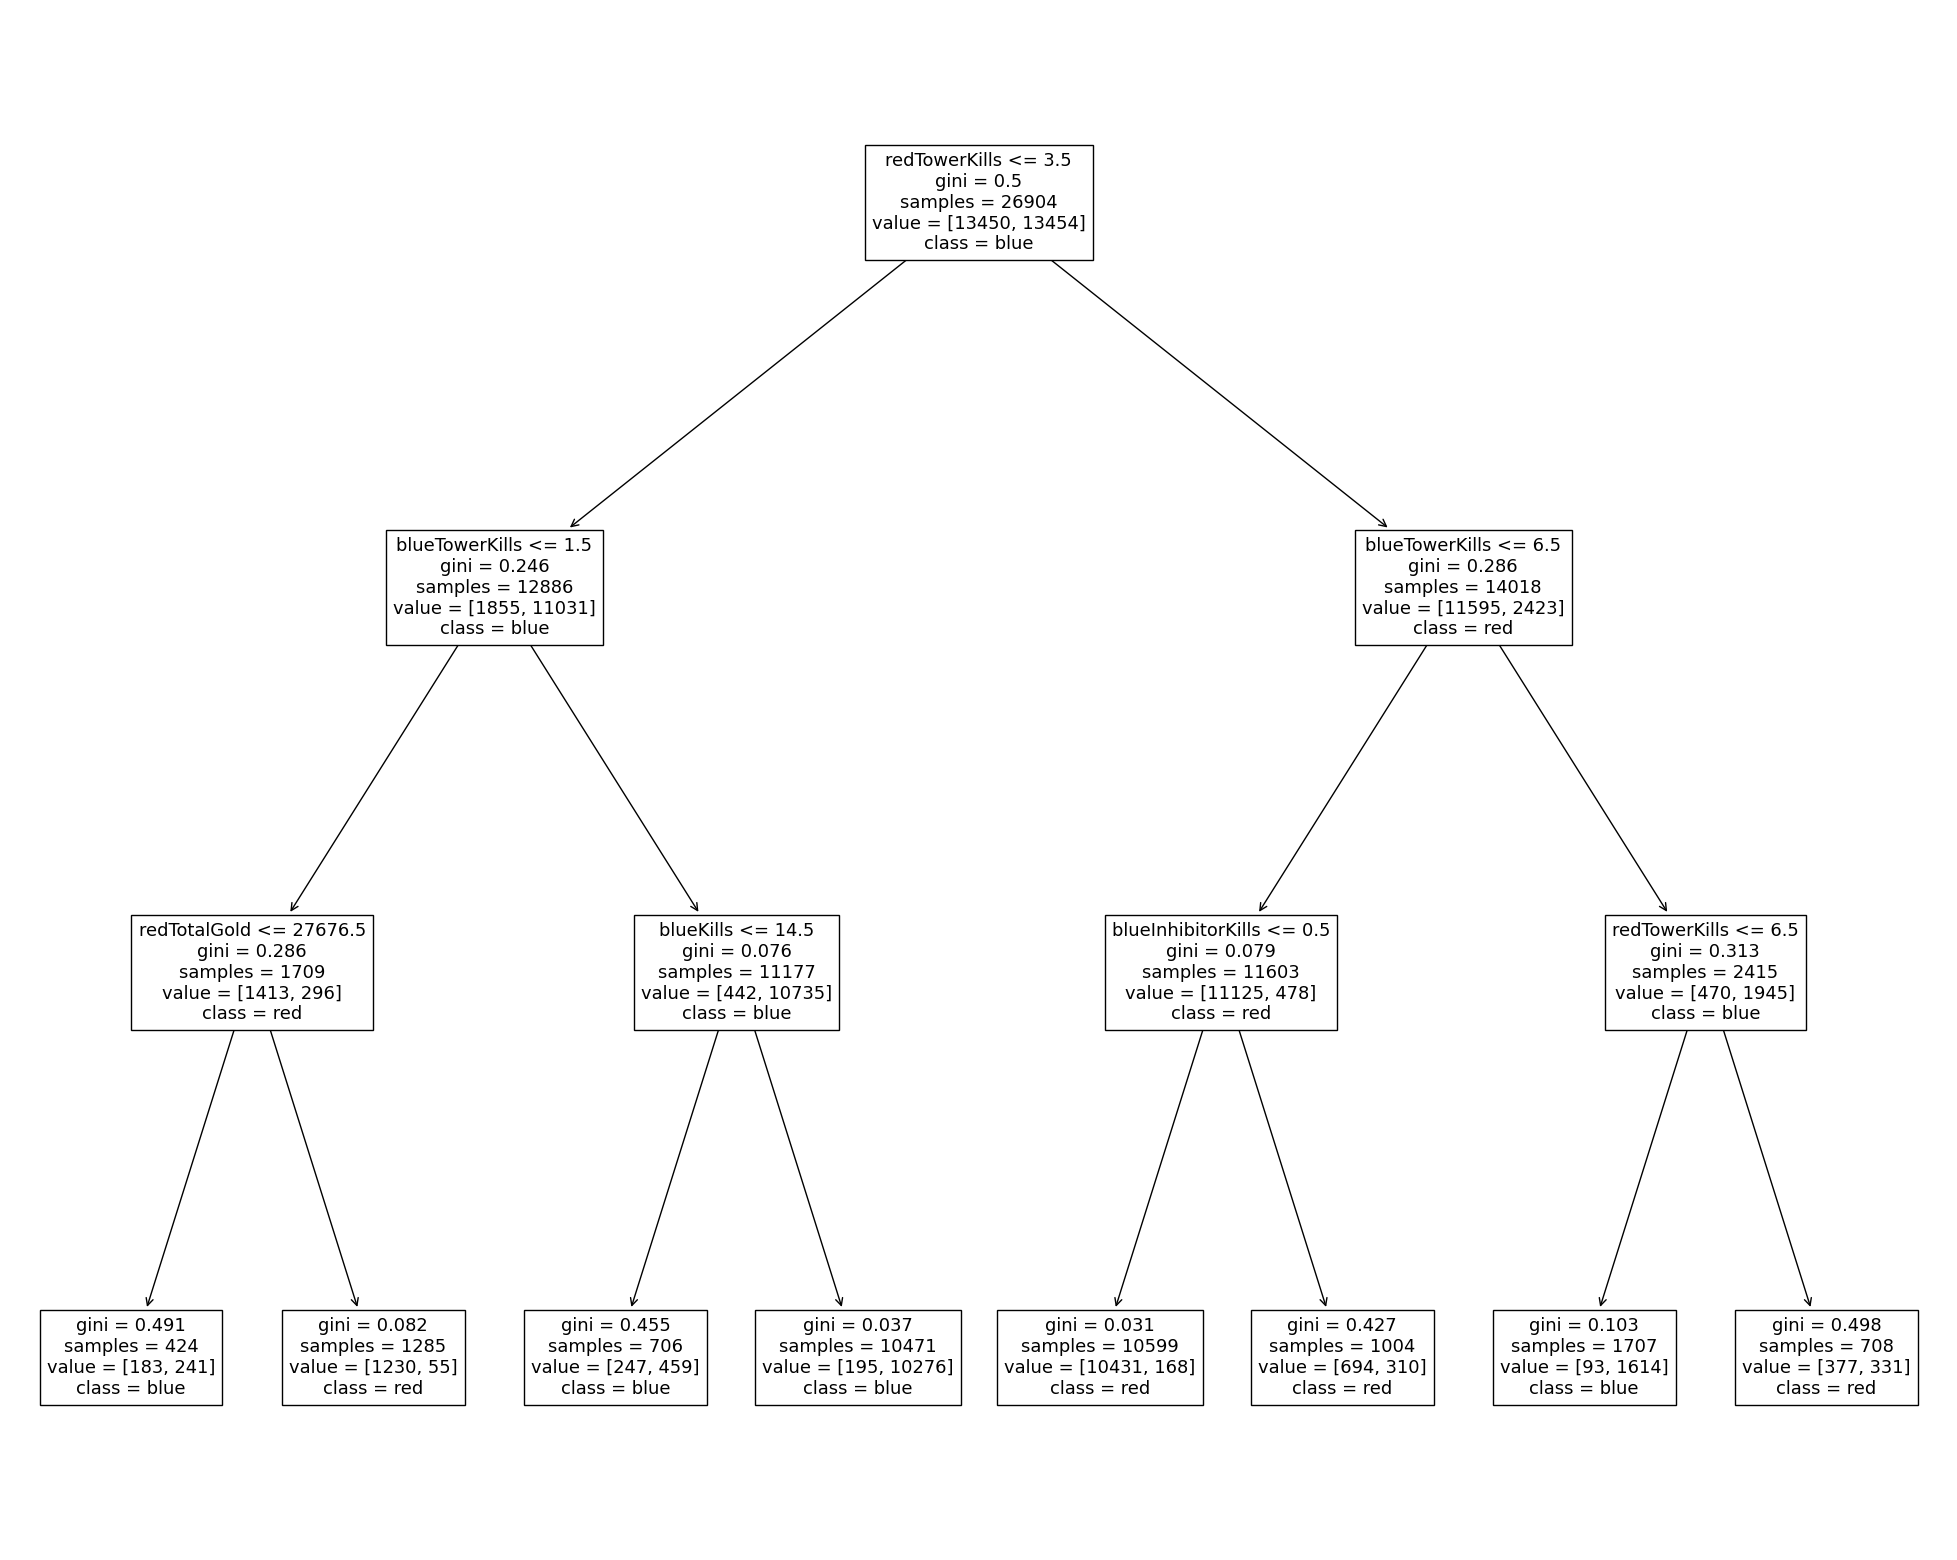

In [6]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25, 20))
tree.plot_tree(model, feature_names=feature_names, class_names=target_names)
fig.savefig('tree.png')
fig.show

In [7]:
from joblib import dump

dump(model, 'tree.joblib')

['tree.joblib']

In [10]:
from pyDatalog import pyDatalog

Ручное составление

In [11]:
pyDatalog.create_terms('U, V, label, redTowerKills, blueTowerKills, redTotalGold')

In [12]:
(label[U] == 'blue') <= (redTowerKills[U] <= 3.5) & (blueTowerKills[U] <= 1.5) & (redTotalGold[U] <= 27676.5)
(label[U] == 'red') <= (redTowerKills[U] <= 3.5) & (blueTowerKills[U] <= 1.5) & (redTotalGold[U] > 27676.5)

(label[U] == 'blue') <= (redTowerKills[U] <= 3.5) & (blueTowerKills[U] > 1.5)

(label[U] == 'red') <= (redTowerKills[U] > 3.5) & (blueTowerKills[U] <= 6.5)

(label[U] == 'blue') <= (redTowerKills[U] > 3.5) & (blueTowerKills[U] > 6.5) & (redTowerKills[U] <= 6.5)
(label[U] == 'red') <= (redTowerKills[U] > 3.5) & (blueTowerKills[U] > 6.5) & (redTowerKills[U] > 6.5)

label[1]==(*,U,'red') <= redTowerKills[1]>(*,U,'3.

In [13]:
redTowerKills[0] = 2
blueTowerKills[0] = 1
redTotalGold[0] = 10000

print(label[0] == U)

redTowerKills[1] = 2
blueTowerKills[1] = 1
redTotalGold[1] = 55600

print(label[1] == U)

redTowerKills[2] = 3
blueTowerKills[2] = 5
redTotalGold[2] = 10000

print(label[2] == U)

redTowerKills[3] = 10
blueTowerKills[3] = 1
redTotalGold[3] = 0

print(label[3] == U)

redTowerKills[4] = 4
blueTowerKills[4] = 7
redTotalGold[4] = 11

print(label[4] == U)

redTowerKills[5] = 10
blueTowerKills[5] = 7
redTotalGold[5] = 20

print(label[5] == U)

U   
----
blue
U  
---
red
U   
----
blue
U  
---
red
U   
----
blue
U  
---
red


Динамическое составление выражений

In [14]:
from joblib import load
import sklearn

model = load('tree.joblib')
classes = model.classes_
tree = model.tree_

n_nodes = tree.node_count
children_left = tree.children_left
children_right = tree.children_right
feature = tree.feature
threshold = tree.threshold
value = tree.value

In [15]:
def get_paths(paths):
    for path in paths:
        left = children_left[path[-1]]
        right = children_right[path[-1]]
        if left != right:
            paths.remove(path)
            paths.append(path + [left])
            paths.append(path + [right])
            #paths.append([right])
            get_paths(paths)
    return paths

paths = [[0]]
paths = get_paths(paths)
paths

[[0, 1, 2, 3],
 [0, 1, 2, 4],
 [0, 1, 5, 6],
 [0, 1, 5, 7],
 [0, 8, 9, 10],
 [0, 8, 9, 11],
 [0, 8, 12, 13],
 [0, 8, 12, 14]]

In [16]:
rules = []
for path in paths:
    conjuncts = []
    for i in range(len(path)):
        node = path[i]
        if node == path[-1]:
            samples = list(value[node][0])
            label = samples.index(max(samples))
        else:
            conjunct = {'feature': feature[node], 
                        'threshold': round(threshold[node], 2)}
            child = path[i + 1]
            if child in children_left:
                conjunct['comparison'] = '<='
            else:
                conjunct['comparison'] = '>'
            conjuncts.append(conjunct)
    rules.append({'label': label, 'conjuncts': conjuncts})

rules

[{'label': 1,
  'conjuncts': [{'feature': 21, 'threshold': 3.5, 'comparison': '<='},
   {'feature': 3, 'threshold': 1.5, 'comparison': '<='},
   {'feature': 29, 'threshold': 27676.5, 'comparison': '<='}]},
 {'label': 0,
  'conjuncts': [{'feature': 21, 'threshold': 3.5, 'comparison': '<='},
   {'feature': 3, 'threshold': 1.5, 'comparison': '<='},
   {'feature': 29, 'threshold': 27676.5, 'comparison': '>'}]},
 {'label': 1,
  'conjuncts': [{'feature': 21, 'threshold': 3.5, 'comparison': '<='},
   {'feature': 3, 'threshold': 1.5, 'comparison': '>'},
   {'feature': 7, 'threshold': 14.5, 'comparison': '<='}]},
 {'label': 1,
  'conjuncts': [{'feature': 21, 'threshold': 3.5, 'comparison': '<='},
   {'feature': 3, 'threshold': 1.5, 'comparison': '>'},
   {'feature': 7, 'threshold': 14.5, 'comparison': '>'}]},
 {'label': 0,
  'conjuncts': [{'feature': 21, 'threshold': 3.5, 'comparison': '>'},
   {'feature': 3, 'threshold': 6.5, 'comparison': '<='},
   {'feature': 4, 'threshold': 0.5, 'comparison

In [17]:
from sklearn import datasets

target_names = {'red': 0, 'blue': 1}

def format_name(name):
    name = str(name)
    name = name.replace(' ', '_')
    name = name.replace('(', '')
    name = name.replace(')', '')
    return name

feature_names = [format_name(x) for x in feature_names]
target_names = [f"'{x}'" for x in target_names]
print(feature_names)
print(target_names)

['gameDuraton', 'blueDragonKills', 'blueBaronKills', 'blueTowerKills', 'blueInhibitorKills', 'blueWardPlaced', 'blueWardkills', 'blueKills', 'blueDeath', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold', 'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel', 'blueJungleMinionKills', 'blueKillingSpree', 'blueTotalHeal', 'blueObjectDamageDealt', 'redDragonKills', 'redBaronKills', 'redTowerKills', 'redInhibitorKills', 'redWardPlaced', 'redWardkills', 'redKills', 'redDeath', 'redAssist', 'redChampionDamageDealt', 'redTotalGold', 'redTotalMinionKills', 'redTotalLevel', 'redAvgLevel', 'redJungleMinionKills', 'redKillingSpree', 'redTotalHeal', 'redObjectDamageDealt']
["'red'", "'blue'"]


In [18]:
tmplts = []
for rule in rules:
    label = target_names[rule['label']]
    tmplt_label = f'(label[U] == {label})'
    conjuncts = rule['conjuncts']
    if conjuncts:
        conditions = []
        for conjunct in conjuncts:
            feature_name = feature_names[conjunct['feature']]
            conditions.append(f'({feature_name}[U] {conjunct["comparison"]} {conjunct["threshold"]})')
            tmplt_condition = ' & '.join(conditions)
            tmplts.append(f'{tmplt_label} <= {tmplt_condition}')
        else:
            tmplts.append(tmplt_label)

tmplts

["(label[U] == 'blue') <= (redTowerKills[U] <= 3.5)",
 "(label[U] == 'blue') <= (redTowerKills[U] <= 3.5) & (blueTowerKills[U] <= 1.5)",
 "(label[U] == 'blue') <= (redTowerKills[U] <= 3.5) & (blueTowerKills[U] <= 1.5) & (redTotalGold[U] <= 27676.5)",
 "(label[U] == 'blue')",
 "(label[U] == 'red') <= (redTowerKills[U] <= 3.5)",
 "(label[U] == 'red') <= (redTowerKills[U] <= 3.5) & (blueTowerKills[U] <= 1.5)",
 "(label[U] == 'red') <= (redTowerKills[U] <= 3.5) & (blueTowerKills[U] <= 1.5) & (redTotalGold[U] > 27676.5)",
 "(label[U] == 'red')",
 "(label[U] == 'blue') <= (redTowerKills[U] <= 3.5)",
 "(label[U] == 'blue') <= (redTowerKills[U] <= 3.5) & (blueTowerKills[U] > 1.5)",
 "(label[U] == 'blue') <= (redTowerKills[U] <= 3.5) & (blueTowerKills[U] > 1.5) & (blueKills[U] <= 14.5)",
 "(label[U] == 'blue')",
 "(label[U] == 'blue') <= (redTowerKills[U] <= 3.5)",
 "(label[U] == 'blue') <= (redTowerKills[U] <= 3.5) & (blueTowerKills[U] > 1.5)",
 "(label[U] == 'blue') <= (redTowerKills[U] <= 3.

In [19]:
feature_indices = [x for x in set(feature) if x >= 0]
predicates = ', '.join([feature_names[x] for x in  feature_indices])
pyDatalog.create_terms('U, V, label,' + predicates)

In [20]:
tmplts.reverse()
knowledge = """\n""".join(tmplts)
print(knowledge)
pyDatalog.load(""" 
""" + knowledge + """
""")
print(knowledge)

(label[U] == 'red')
(label[U] == 'red') <= (redTowerKills[U] > 3.5) & (blueTowerKills[U] > 6.5) & (redTowerKills[U] > 6.5)
(label[U] == 'red') <= (redTowerKills[U] > 3.5) & (blueTowerKills[U] > 6.5)
(label[U] == 'red') <= (redTowerKills[U] > 3.5)
(label[U] == 'blue')
(label[U] == 'blue') <= (redTowerKills[U] > 3.5) & (blueTowerKills[U] > 6.5) & (redTowerKills[U] <= 6.5)
(label[U] == 'blue') <= (redTowerKills[U] > 3.5) & (blueTowerKills[U] > 6.5)
(label[U] == 'blue') <= (redTowerKills[U] > 3.5)
(label[U] == 'red')
(label[U] == 'red') <= (redTowerKills[U] > 3.5) & (blueTowerKills[U] <= 6.5) & (blueInhibitorKills[U] > 0.5)
(label[U] == 'red') <= (redTowerKills[U] > 3.5) & (blueTowerKills[U] <= 6.5)
(label[U] == 'red') <= (redTowerKills[U] > 3.5)
(label[U] == 'red')
(label[U] == 'red') <= (redTowerKills[U] > 3.5) & (blueTowerKills[U] <= 6.5) & (blueInhibitorKills[U] <= 0.5)
(label[U] == 'red') <= (redTowerKills[U] > 3.5) & (blueTowerKills[U] <= 6.5)
(label[U] == 'red') <= (redTowerKills[U]

In [21]:
x = 999 # 0, 1, 2, 3, 4, 5
row = data_predict.iloc[x]
for i in feature_indices:
    fact = f'{feature_names[i]}[{x}] = {row[i]}'
    print(fact)
    exec(fact)
print(y[x])

# 1: blue, 0: red
# 1 ошибка из 7 - OK

blueTowerKills[999] = 1.0
blueInhibitorKills[999] = 0.0
blueKills[999] = 10.0
redTowerKills[999] = 8.0
redTotalGold[999] = 43898.0
0


In [22]:
print(pyDatalog.ask('label[U] == V'))

{(0, 'blue'), (5, 'red'), (2, 'blue'), (4, 'red'), (1, 'blue'), (999, 'red'), (3, 'red')}
